In [1]:
import numpy as np
import pandas as pd
import pylab as plt

In [2]:
dta = np.array([3.665,4.247,4.674,3.669,4.752,4.785,5.929,4.468,5.102,4.831,6.889,5.337,
                5.086,5.603,4.153,4.945,5.726,4.965,1.820,3.723,5.663,4.739,4.845,4.535,
                4.774,5.962,6.614,5.255,5.355,6.144,5.590,4.388,3.447,4.615,6.032,5.740,
                4.391,3.128,3.436,4.964,6.332,7.665,5.277,4.904,4.830])
data = pd.Series(dta,name='mortality rate')

D:\Soft\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


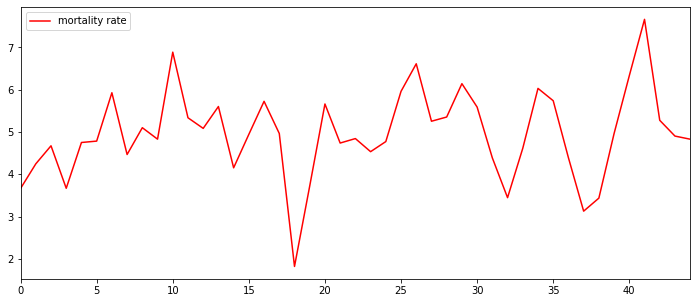

In [3]:
data.plot(figsize=[12,5],colors='r')
plt.legend()

In [5]:
from statsmodels.stats.diagnostic import unitroot_adf # 平稳性检验
from statsmodels.stats.diagnostic import acorr_ljungbox    #白噪声检验
print(unitroot_adf(data))
print("-------+-+-+-+这-里-是-分-割-线+-+-+-+-----------")
print(acorr_ljungbox(data,lags=6))

(-5.188684355068969, 9.272010850042899e-06, 1, 43, {'1%': -3.5925042342183704, '5%': -2.931549768951162, '10%': -2.60406594375338}, 94.32735546827875)
-------+-+-+-+这-里-是-分-割-线+-+-+-+-----------
(array([ 5.82787283,  7.2284351 , 10.11229059, 10.13947648, 10.4544852 ,
       10.62502801]), array([0.01577419, 0.02693799, 0.01763535, 0.03814263, 0.06333539,
       0.10068007]))


D:\Soft\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


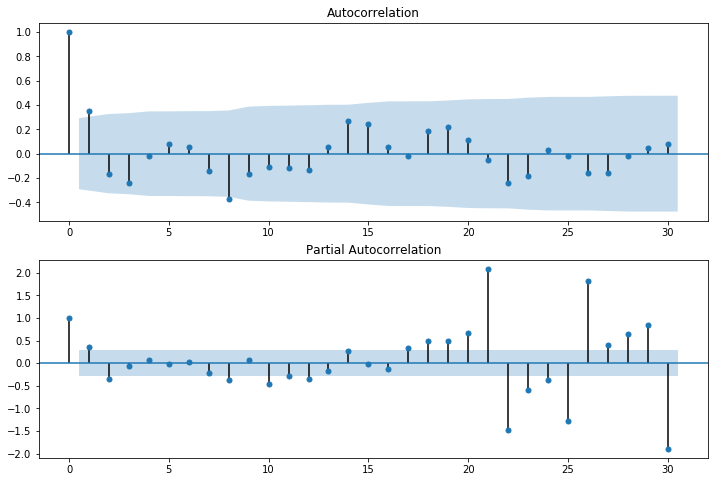

In [6]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_acf(data.values.squeeze(),lags=30,ax=ax1)
fig = sm.graphics.tsa.plot_pacf(data,lags=30,ax=ax2)

In [7]:
# 根据bic准则编写函数来推荐最优的模型：
def SelectModel(data):
    best_model = sm.tsa.ARMA(data,(0,0)).fit()
    for i in range(4):
        for j in range(4):
            arma_mod = sm.tsa.ARMA(data,(i,j)).fit()
            print('当p和q为，相应的bic值为：',i,j,arma_mod.bic)
            if best_model.bic > arma_mod.bic :
                best_model = arma_mod
    print('根据bic准则，选出最优的模型为：',best_model.summary2())
            
SelectModel(data)

当p和q为，相应的bic值为： 0 0 138.70102518500698
当p和q为，相应的bic值为： 0 1 133.83584716964583
当p和q为，相应的bic值为： 0 2 137.56678491475162
当p和q为，相应的bic值为： 0 3 134.97682632453112
当p和q为，相应的bic值为： 1 0 136.5985235855018
当p和q为，相应的bic值为： 1 1 137.61822128675396
当p和q为，相应的bic值为： 1 2 136.9440356413783
当p和q为，相应的bic值为： 1 3 137.88802861567083
当p和q为，相应的bic值为： 2 0 135.29058713656002
当p和q为，相应的bic值为： 2 1 138.99521239057157
当p和q为，相应的bic值为： 2 2 139.02637799625217
当p和q为，相应的bic值为： 2 3 140.30399627166648
当p和q为，相应的bic值为： 3 0 138.95173374400946
当p和q为，相应的bic值为： 3 1 139.0639933742243
当p和q为，相应的bic值为： 3 2 144.4939364674953
当p和q为，相应的bic值为： 3 3 144.1457637506076
根据bic准则，选出最优的模型为：                           Results: ARMA
Model:              ARMA             BIC:                 133.8358
Dependent Variable: mortality rate   Log-Likelihood:      -61.208 
Date:               2019-11-12 21:42 Scale:               1.0000  
No. Observations:   45               Method:              css-mle 
Df Model:           2                Sample:           

D:\Soft\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [8]:
arma_mod = sm.tsa.ARMA(data,(0,1)).fit()
print(arma_mod.params)
arma_mod.bic

const                   4.944173
ma.L1.mortality rate    0.449929
dtype: float64


133.83584716964583

In [10]:
# 模型的检验
# 原假设是，序列剩下的没被用来预测的部分的信息为白噪声
# 若不拒绝原假设，则通过检验，模型显著
from scipy import stats
resid = arma_mod.resid
stats.normaltest(resid)


NormaltestResult(statistic=4.151840432760062, pvalue=0.12544094155617466)

In [11]:
predict_number = arma_mod.predict(len(data),len(data)+5)
print(predict_number)

45    4.842058
46    4.944173
47    4.944173
48    4.944173
49    4.944173
50    4.944173
dtype: float64


In [12]:
arma_mod.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: ARMA
==================================================================
Model:              ARMA             BIC:                 133.8358
Dependent Variable: mortality rate   Log-Likelihood:      -61.208 
Date:               2019-11-12 21:46 Scale:               1.0000  
No. Observations:   45               Method:              css-mle 
Df Model:           2                Sample:              0       
Df Residuals:       43                                    5       
Converged:          1.0000           S.D. of innovations: 0.941   
No. Iterations:     5.0000           HQIC:                130.436 
AIC:                128.4159                                      
------------------------------------------------------------------
                      Coef.  Std.Err.    t    P>|t|  [0.025 0.975]
------------------------------------------------------------------
const                 4.9442   0.2019 24.4854 0.0000 4.5484 5.3399
ma.L1.mortality rate  0.4499   0.1203  3.7396 0.0005 0.2141 0.6857
--------------------------------------------------------------------------
                 Real          Imaginary         Modulus         Frequency
--------------------------------------------------------------------------
MA.1           -2.2226            0.0000          2.2226            0.5000
==================================================================

"""